#### Import Required Libraries

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style 
sns.set(style='whitegrid')

#### Load the Dataset

In [23]:
# Load the CSV file into a DataFrame
df = pd.read_csv('airqualityindex.csv')

df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",09-04-2025 10:00:00,14.465052,78.824187,SO2,15.0,16.0,15.0
1,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",09-04-2025 10:00:00,16.987287,81.736318,PM10,30.0,75.0,50.0
2,India,Andhra_Pradesh,Tirumala,"Toll Gate, Tirumala - APPCB (Formerly known as...",09-04-2025 10:00:00,13.670000,79.350000,PM2.5,20.0,58.0,38.0
3,India,Andhra_Pradesh,Tirumala,"Toll Gate, Tirumala - APPCB (Formerly known as...",09-04-2025 10:00:00,13.670000,79.350000,PM10,27.0,75.0,48.0
4,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",09-04-2025 10:00:00,11.654054,92.734055,NH3,1.0,3.0,2.0


#### Clean the Dataset

In [24]:
# Check how many missing values are present in each column
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    176
pollutant_max    176
pollutant_avg    176
dtype: int64

In [25]:
# Drop rows that have missing values in pollutant_min, pollutant_max, or pollutant_avg
df = df.dropna(subset=["pollutant_min", "pollutant_max", "pollutant_avg"])

In [26]:
# Convert 'last_update' column to datetime to allow time-based analysis
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

In [27]:
# Remove any completely duplicated rows from the dataset
df = df.drop_duplicates()
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",2025-09-04 10:00:00,14.465052,78.824187,SO2,15.0,16.0,15.0
1,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",2025-09-04 10:00:00,16.987287,81.736318,PM10,30.0,75.0,50.0
2,India,Andhra_Pradesh,Tirumala,"Toll Gate, Tirumala - APPCB (Formerly known as...",2025-09-04 10:00:00,13.670000,79.350000,PM2.5,20.0,58.0,38.0
3,India,Andhra_Pradesh,Tirumala,"Toll Gate, Tirumala - APPCB (Formerly known as...",2025-09-04 10:00:00,13.670000,79.350000,PM10,27.0,75.0,48.0
4,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",2025-09-04 10:00:00,11.654054,92.734055,NH3,1.0,3.0,2.0


####  Check for Duplicates

In [28]:
# ! Check how many duplicate rows exist in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
df = df.drop_duplicates()

Number of duplicate rows: 0


#### Outlier Detection using IQR Method

In [29]:
# ! Outlier detection using IQR method
numerical_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_summary_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])
print(outlier_summary_df)

          Column  Outlier_Count
0  pollutant_min            125
1  pollutant_max            146
2  pollutant_avg            106


#### Correlation Matrix

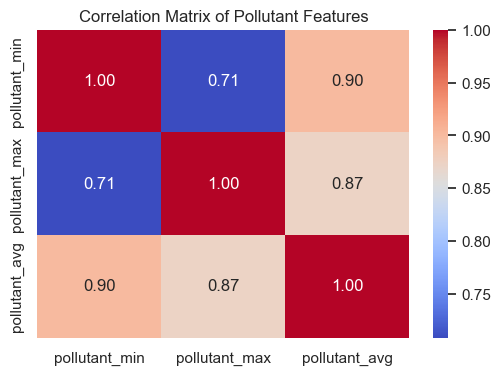

In [32]:
#! Correlation matrix to identify relationships between pollutant features
numeric_data = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Pollutant Features")
plt.show()

### Objective 1: Most Frequently Monitored Pollutants

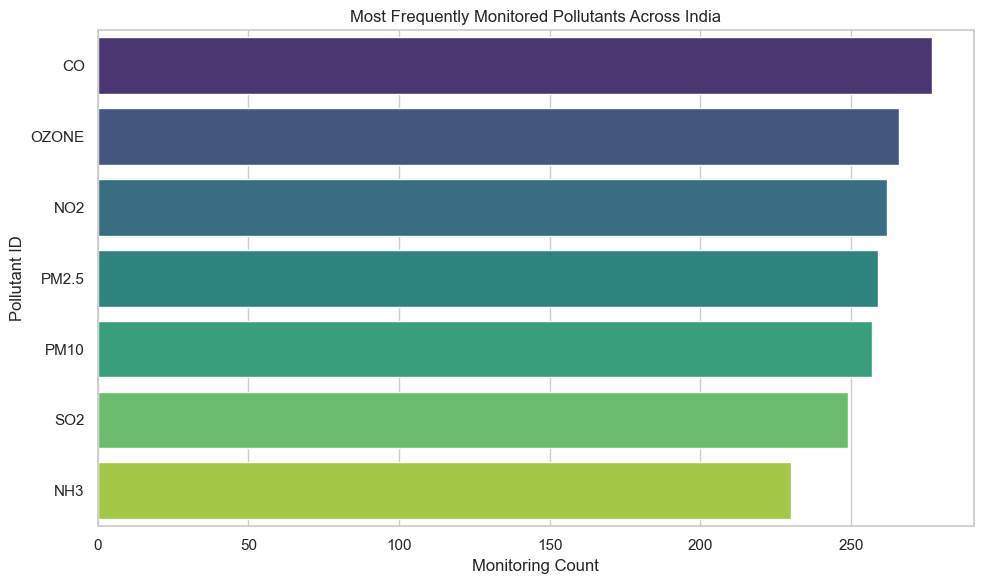

In [37]:
# ! Objective 1: Analyze most frequently monitored pollutants across India 

pollutant_counts = df['pollutant_id'].value_counts().reset_index()
pollutant_counts.columns = ['pollutant_id', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(data=pollutant_counts, x='count', y='pollutant_id', hue='pollutant_id', dodge=False, legend=False, palette='viridis')
plt.xlabel('Monitoring Count')
plt.ylabel('Pollutant ID')
plt.title('Most Frequently Monitored Pollutants Across India')
plt.tight_layout()
plt.show()

### Objective 2: Top 10 Cities with the Highest Average Pollutant Levels

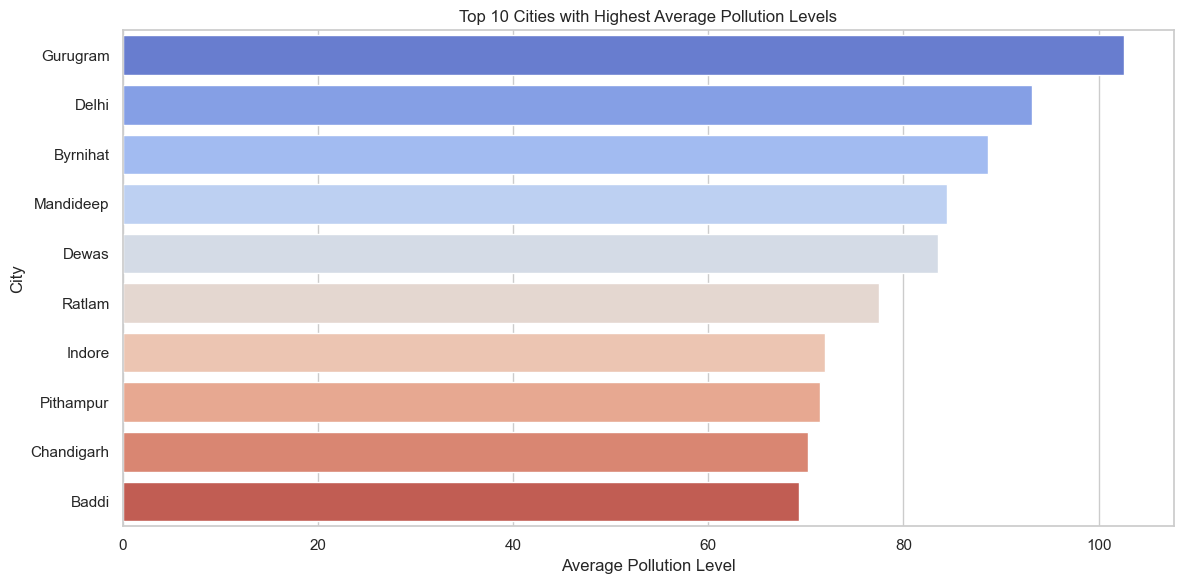

In [41]:
# ! Objective 2: Top 10 cities with highest average pollution levels

city_pollution = df.groupby('city')['pollutant_avg'].mean().reset_index()
top10_cities = city_pollution.sort_values('pollutant_avg', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_cities, x='pollutant_avg', y='city', hue='city', dodge=False, palette='coolwarm', legend=False)
plt.xlabel('Average Pollution Level')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Average Pollution Levels')
plt.tight_layout()
plt.show()

### Objective 3: State-wise average pollutant levels

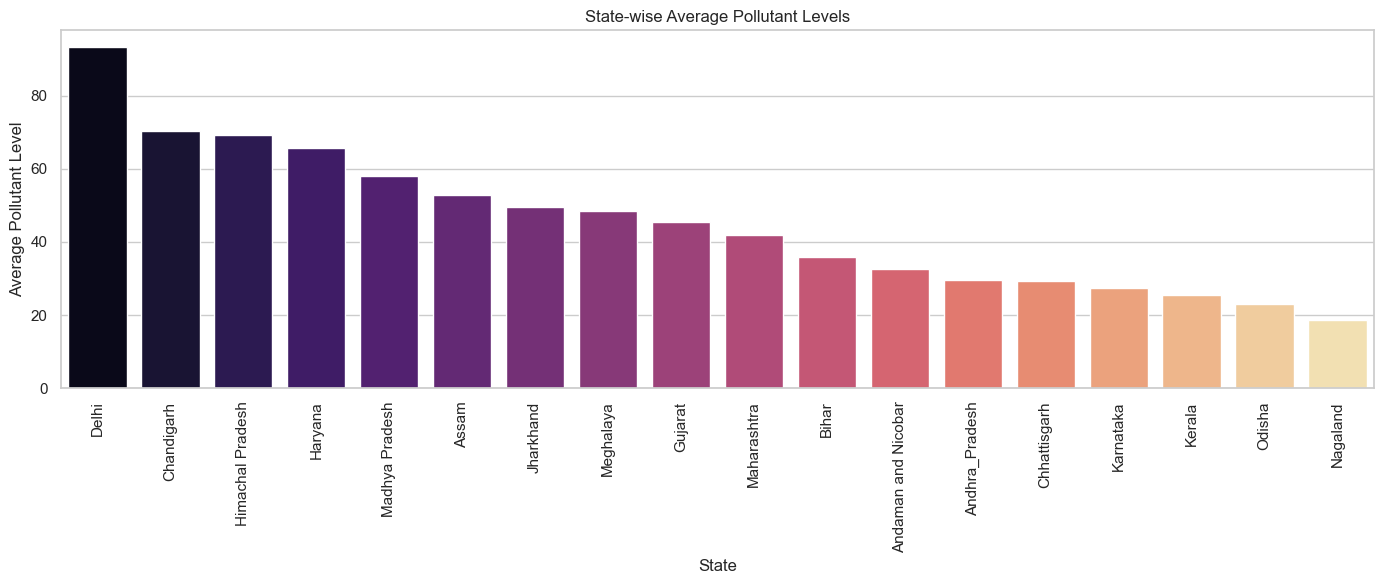

In [43]:
# ! Objective 3: State-wise average pollutant levels

state_pollution = df.groupby('state')['pollutant_avg'].mean().reset_index()
state_pollution = state_pollution.sort_values('pollutant_avg', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=state_pollution, x='state', y='pollutant_avg', hue='state', palette='magma', dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Pollutant Level')
plt.title('State-wise Average Pollutant Levels')
plt.tight_layout()
plt.show()


### Objective 4: Distribution of Pollutant Average Values for Each Pollutant Type

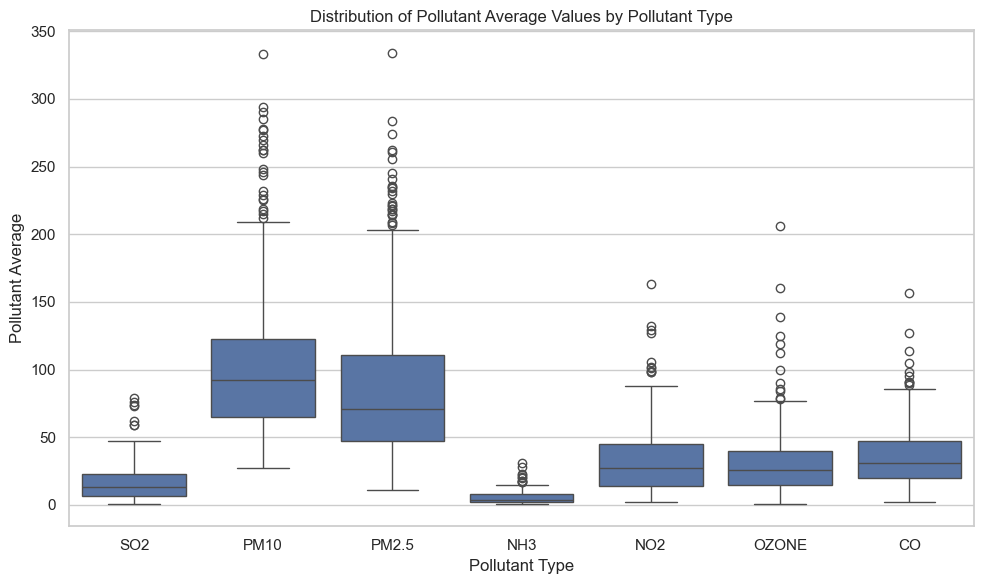

In [55]:
# ! Objective 4: Distribution of pollutant_avg for each pollutant type

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='pollutant_id', y='pollutant_avg')
plt.title('Distribution of Pollutant Average Values by Pollutant Type')
plt.xlabel('Pollutant Type')
plt.ylabel('Pollutant Average')
plt.tight_layout()
plt.show()

### Objective 5: Comparison between pollutant_min and pollutant_max for each pollutant type

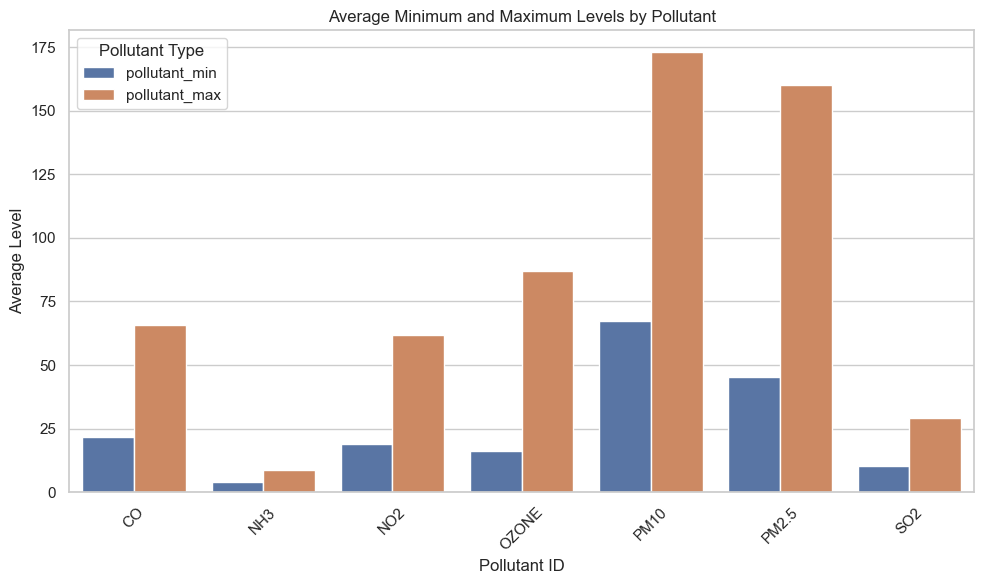

In [48]:
# ! Objective 5: Comparison between pollutant_min and pollutant_max for each pollutant type

pollutant_min_max = df.groupby('pollutant_id')[['pollutant_min', 'pollutant_max']].mean().reset_index()
pollutant_melted = pollutant_min_max.melt(id_vars='pollutant_id',
                                          value_vars=['pollutant_min', 'pollutant_max'],
                                          var_name='Pollutant Type', value_name='Average Value')

plt.figure(figsize=(10,6))
sns.barplot(data=pollutant_melted, x='pollutant_id', y='Average Value', hue='Pollutant Type')
plt.title('Average Minimum and Maximum Levels by Pollutant')
plt.xlabel('Pollutant ID')
plt.ylabel('Average Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Objective 6: Average Pollution Levels Across Top States and Pollutants

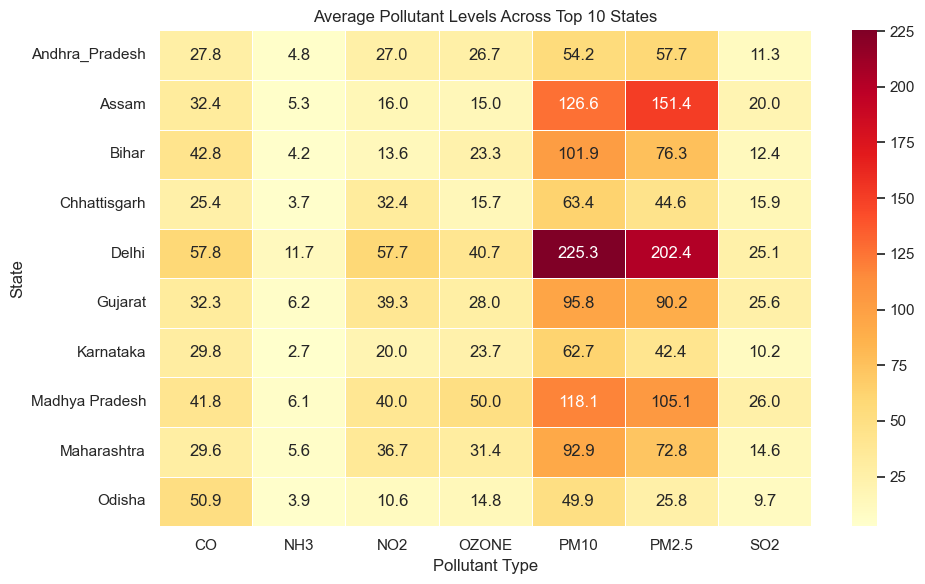

In [56]:
# ! Objective 6: Average pollution levels across top states and pollutant types 

top_states = df['state'].value_counts().head(10).index
filtered_df = df[df['state'].isin(top_states)]
pivot = filtered_df.pivot_table(values='pollutant_avg', index='state', columns='pollutant_id', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt=".1f", linewidths=0.5)
plt.title('Average Pollutant Levels Across Top 10 States')
plt.xlabel('Pollutant Type')
plt.ylabel('State')
plt.tight_layout()
plt.show()